print(1) this



In [1]:


print(1)


1


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense

# Define mock data dimensions
num_users = 100
embedding_dim = 16

# Build a sample model with an embedding layer
user_input = Input(shape=(1,), name='user_input')
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, name='user_embedding')(user_input)
user_vector = Flatten()(user_embedding)
output = Dense(1, activation='sigmoid')(user_vector)

model = Model(inputs=user_input, outputs=output)

In [6]:
	#2.	Train the model (optional for testing):


In [7]:
# Generate mock data
user_ids = np.random.randint(0, num_users, size=(1000,))
labels = np.random.randint(0, 2, size=(1000,))

# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(user_ids, labels, epochs=5, batch_size=32)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.4996 - loss: 0.6933
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.5888 - loss: 0.6902
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.6184 - loss: 0.6872
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - accuracy: 0.6248 - loss: 0.6817
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - accuracy: 0.6247 - loss: 0.6789


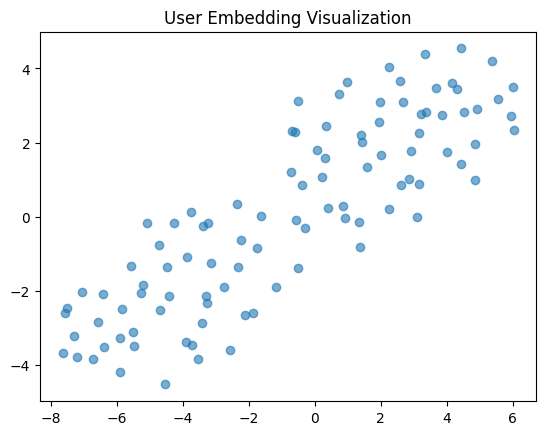

In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Mock embeddings for visualization
embeddings = model.get_layer('user_embedding').get_weights()[0]
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.6)
plt.title('User Embedding Visualization')
plt.show()

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4926 - loss: 0.6948 - val_accuracy: 0.5200 - val_loss: 0.6919
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.5402 - loss: 0.6905 - val_accuracy: 0.5650 - val_loss: 0.6918
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.5953 - loss: 0.6868 - val_accuracy: 0.5600 - val_loss: 0.6913
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.6355 - loss: 0.6817 - val_accuracy: 0.5400 - val_loss: 0.6914
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.6100 - loss: 0.6820 - val_accuracy: 0.5450 - val_loss: 0.6913


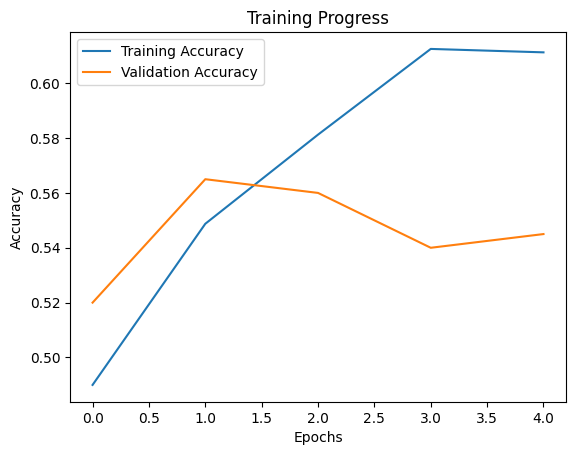

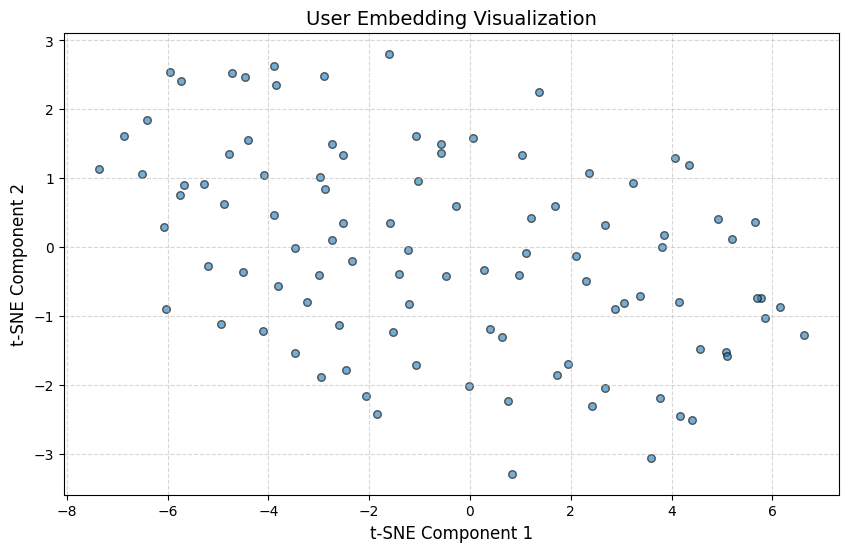

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.manifold import TSNE

# Define mock data dimensions
num_users = 100
embedding_dim = 16

# Build a sample model with an embedding layer
user_input = Input(shape=(1,), name='user_input')
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, name='user_embedding')(user_input)
user_vector = Flatten()(user_embedding)
output = Dense(1, activation='sigmoid')(user_vector)

model = Model(inputs=user_input, outputs=output)

# Generate mock data
user_ids = np.random.randint(0, num_users, size=(1000,))
labels = np.random.randint(0, 2, size=(1000,))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(user_ids, labels, epochs=5, batch_size=32, validation_split=0.2)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Progress')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Extract weights from the user embedding layer
embeddings = model.get_layer('user_embedding').get_weights()[0]

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

# Plot the reduced embeddings
plt.figure(figsize=(10, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.6, s=30, edgecolor='k')
plt.title('User Embedding Visualization', fontsize=14)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()